In [1]:
import pandas as pd
import numpy as np
import talib as ta
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

In [2]:
start = '2019-07-01'
end = '2020-07-01'
 
df = data.DataReader('^N225', 'yahoo', start, end)

In [3]:
df.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-07-01,21758.339844,21559.169922,21566.269531,21729.970703,66900000,21729.970703
2019-07-02,21784.220703,21697.310547,21699.429688,21754.269531,54700000,21754.269531
2019-07-03,21708.720703,21566.650391,21684.070312,21638.160156,55000000,21638.160156
2019-07-04,21755.630859,21672.500000,21740.929688,21702.449219,37800000,21702.449219
2019-07-05,21746.380859,21647.730469,21703.609375,21746.380859,44800000,21746.380859
2019-07-08,21672.650391,21499.570312,21665.789062,21534.349609,51900000,21534.349609
2019-07-09,21687.289062,21508.220703,21598.150391,21565.150391,53900000,21565.150391
2019-07-10,21601.859375,21488.220703,21499.460938,21533.480469,58900000,21533.480469
2019-07-11,21649.929688,21532.570312,21547.189453,21643.529297,49600000,21643.529297


In [4]:
date=df.index
close=df['Adj Close']

In [5]:
span01=5
span02=25
span03=50

df['sma01'] = close.rolling(window=span01).mean()
df['sma02'] = close.rolling(window=span02).mean()
df['sma03'] = close.rolling(window=span03).mean()

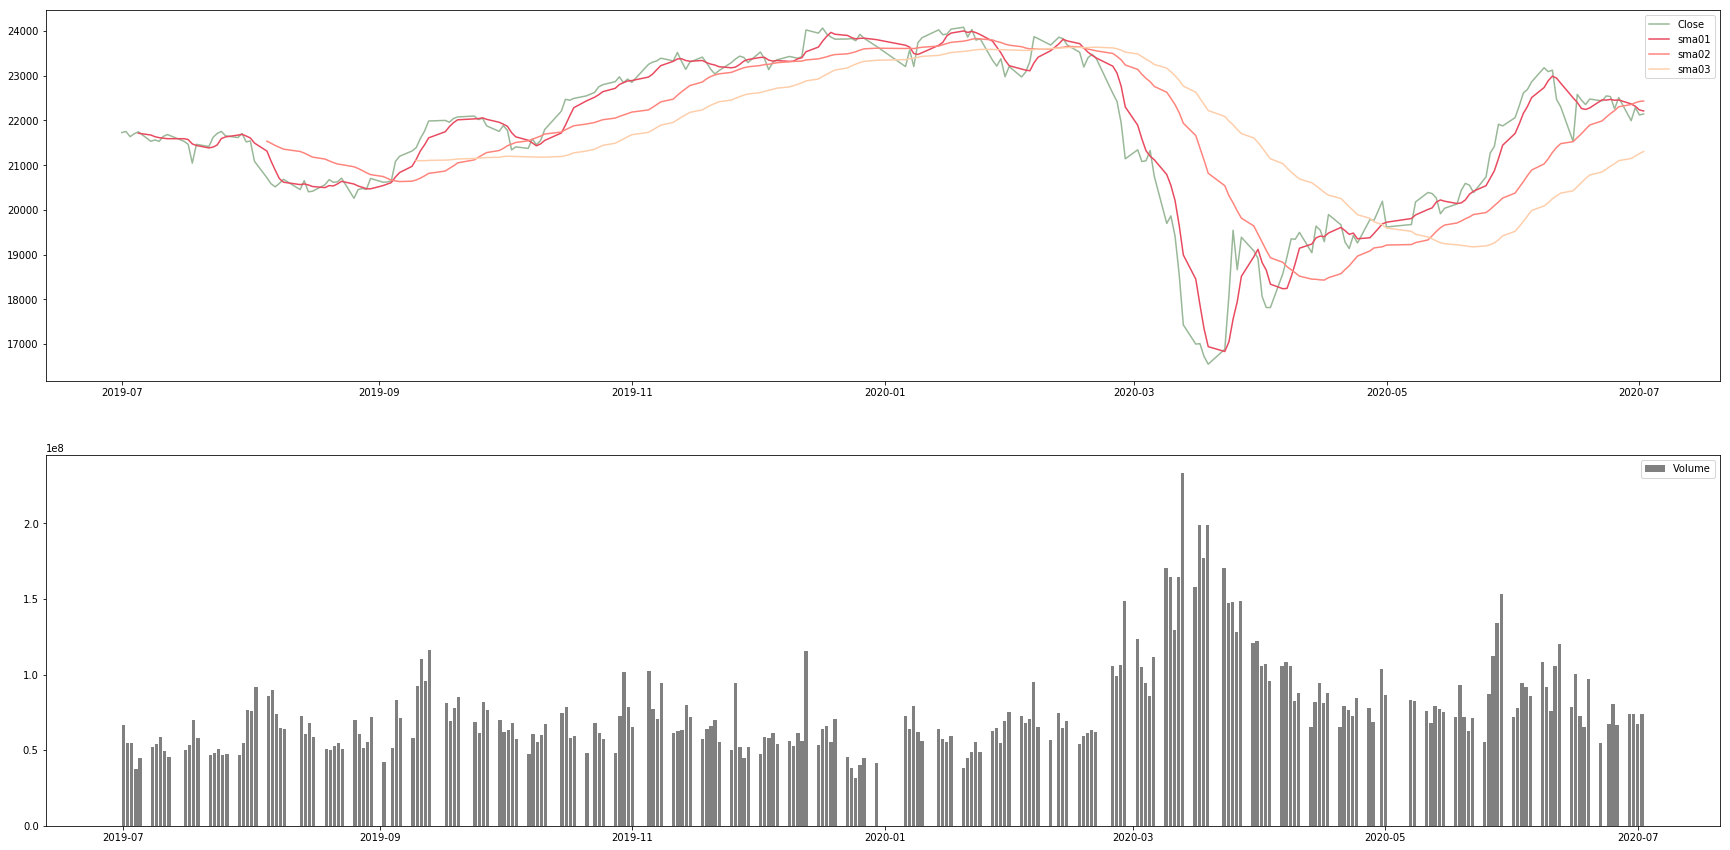

In [6]:
plt.figure(figsize=(30, 15))
plt.subplot(2,1,1)

plt.plot(date,close,label='Close',color='#99b898')
plt.plot(date,df['sma01'],label='sma01',color='#e84a5f')
plt.plot(date,df['sma02'],label='sma02',color='#ff847c')
plt.plot(date,df['sma03'],label='sma03',color='#feceab')
plt.legend()

plt.subplot(2,1,2)
plt.bar(date,df['Volume'],label='Volume',color='grey')
plt.legend()

### ▼ MACD

In [7]:
df['macd'], df['macdsignal'], df['macdhist'] = ta.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)

In [8]:
df.head()

,High,Low,Open,Close,Volume,Adj Close,sma01,sma02,sma03,macd,macdsignal,macdhist
Date,,,,,,,,,,,,
2019-07-01,21758.339844,21559.169922,21566.269531,21729.970703,66900000,21729.970703,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-02,21784.220703,21697.310547,21699.429688,21754.269531,54700000,21754.269531,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-03,21708.720703,21566.650391,21684.070312,21638.160156,55000000,21638.160156,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-04,21755.630859,21672.500000,21740.929688,21702.449219,37800000,21702.449219,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-05,21746.380859,21647.730469,21703.609375,21746.380859,44800000,21746.380859,21714.246094,NaN,NaN,NaN,NaN,NaN


In [9]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close,sma01,sma02,sma03,macd,macdsignal,macdhist
Date,,,,,,,,,,,,
2020-06-26,22589.140625,22408.269531,22424.369141,22512.080078,66600000,22512.080078,22458.501953,22306.225234,21102.236562,357.802813,463.676153,-105.873340
2020-06-29,22281.380859,21969.589844,22255.050781,21995.039062,73700000,21995.039062,22370.055859,22356.360781,21149.361133,298.284895,430.597901,-132.313007
2020-06-30,22448.300781,22273.380859,22335.099609,22288.140625,74200000,22288.140625,22317.873828,22397.039609,21204.122148,271.636110,398.805543,-127.169433
2020-07-01,22360.310547,22039.560547,22338.300781,22121.730469,67400000,22121.730469,22235.355859,22425.139609,21260.752773,234.386981,365.921831,-131.534850
2020-07-02,22267.509766,22072.109375,22182.679688,22145.960938,73600000,22145.960938,22212.590234,22434.325625,21305.726797,204.465028,333.630470,-129.165442


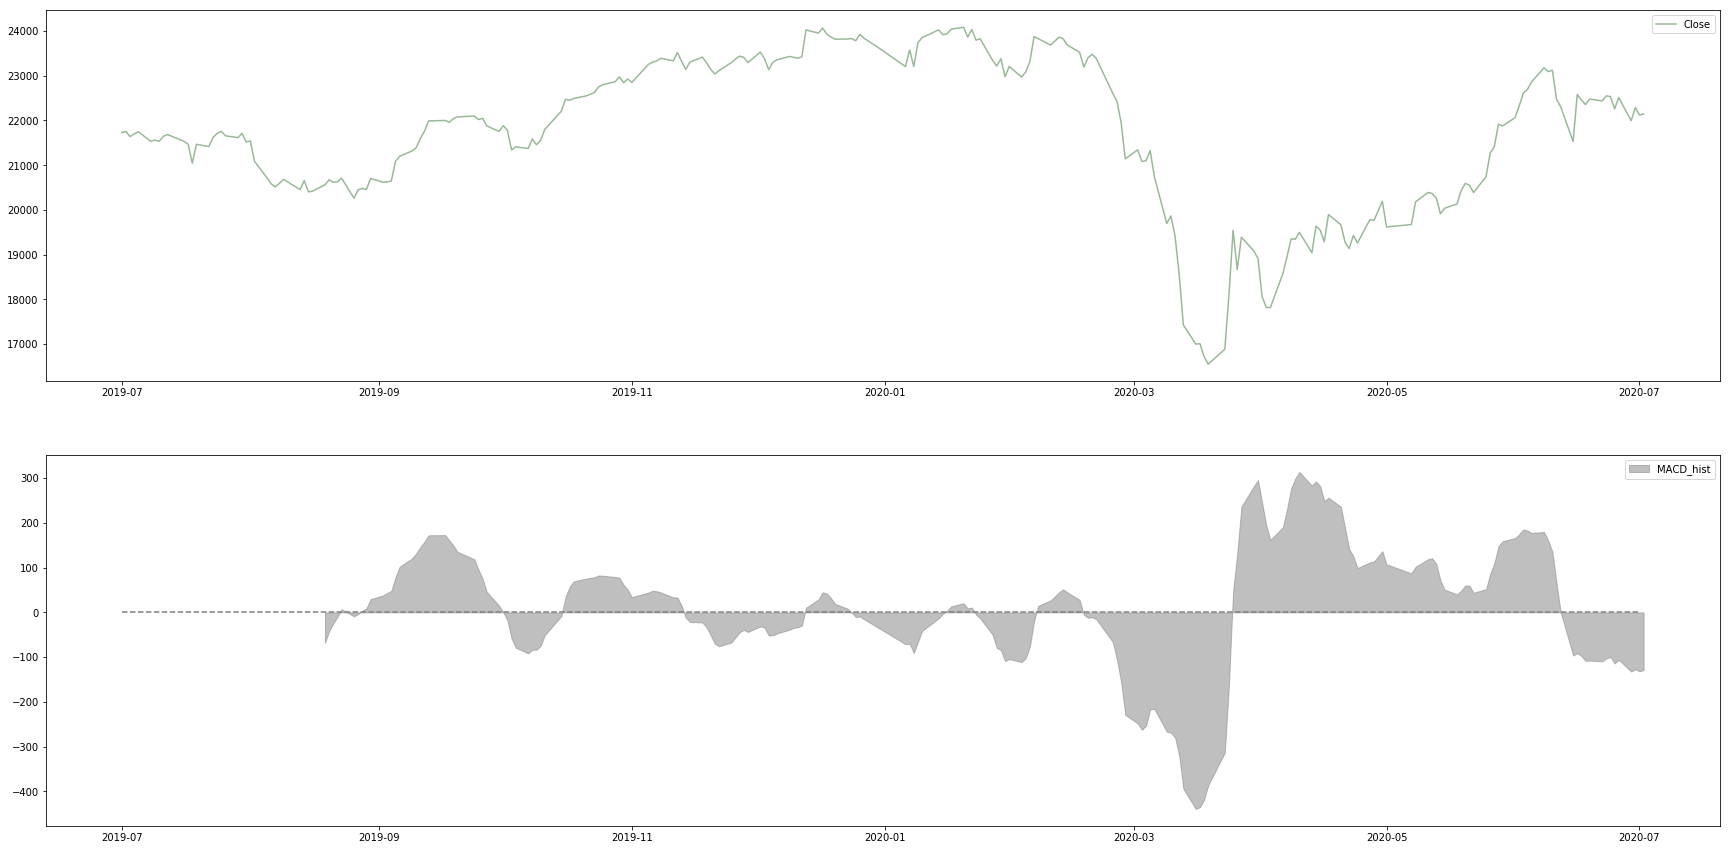

In [10]:
plt.figure(figsize=(30, 15))
plt.subplot(2,1,1)

plt.plot(date,close,label='Close',color='#99b898')
plt.legend()

plt.subplot(2,1,2)
plt.fill_between(date, df['macdhist'], color = 'grey', alpha=0.5, label='MACD_hist')
plt.hlines(0,start,end,"gray",linestyles="dashed")
plt.legend()

### ▼ RSI

In [11]:
df['RSI'] = ta.RSI(close, timeperiod=span02)

In [12]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close,sma01,sma02,sma03,macd,macdsignal,macdhist,RSI
Date,,,,,,,,,,,,,
2020-06-26,22589.140625,22408.269531,22424.369141,22512.080078,66600000,22512.080078,22458.501953,22306.225234,21102.236562,357.802813,463.676153,-105.873340,57.560379
2020-06-29,22281.380859,21969.589844,22255.050781,21995.039062,73700000,21995.039062,22370.055859,22356.360781,21149.361133,298.284895,430.597901,-132.313007,53.315995
2020-06-30,22448.300781,22273.380859,22335.099609,22288.140625,74200000,22288.140625,22317.873828,22397.039609,21204.122148,271.636110,398.805543,-127.169433,55.263914
2020-07-01,22360.310547,22039.560547,22338.300781,22121.730469,67400000,22121.730469,22235.355859,22425.139609,21260.752773,234.386981,365.921831,-131.534850,53.933006
2020-07-02,22267.509766,22072.109375,22182.679688,22145.960938,73600000,22145.960938,22212.590234,22434.325625,21305.726797,204.465028,333.630470,-129.165442,54.100664


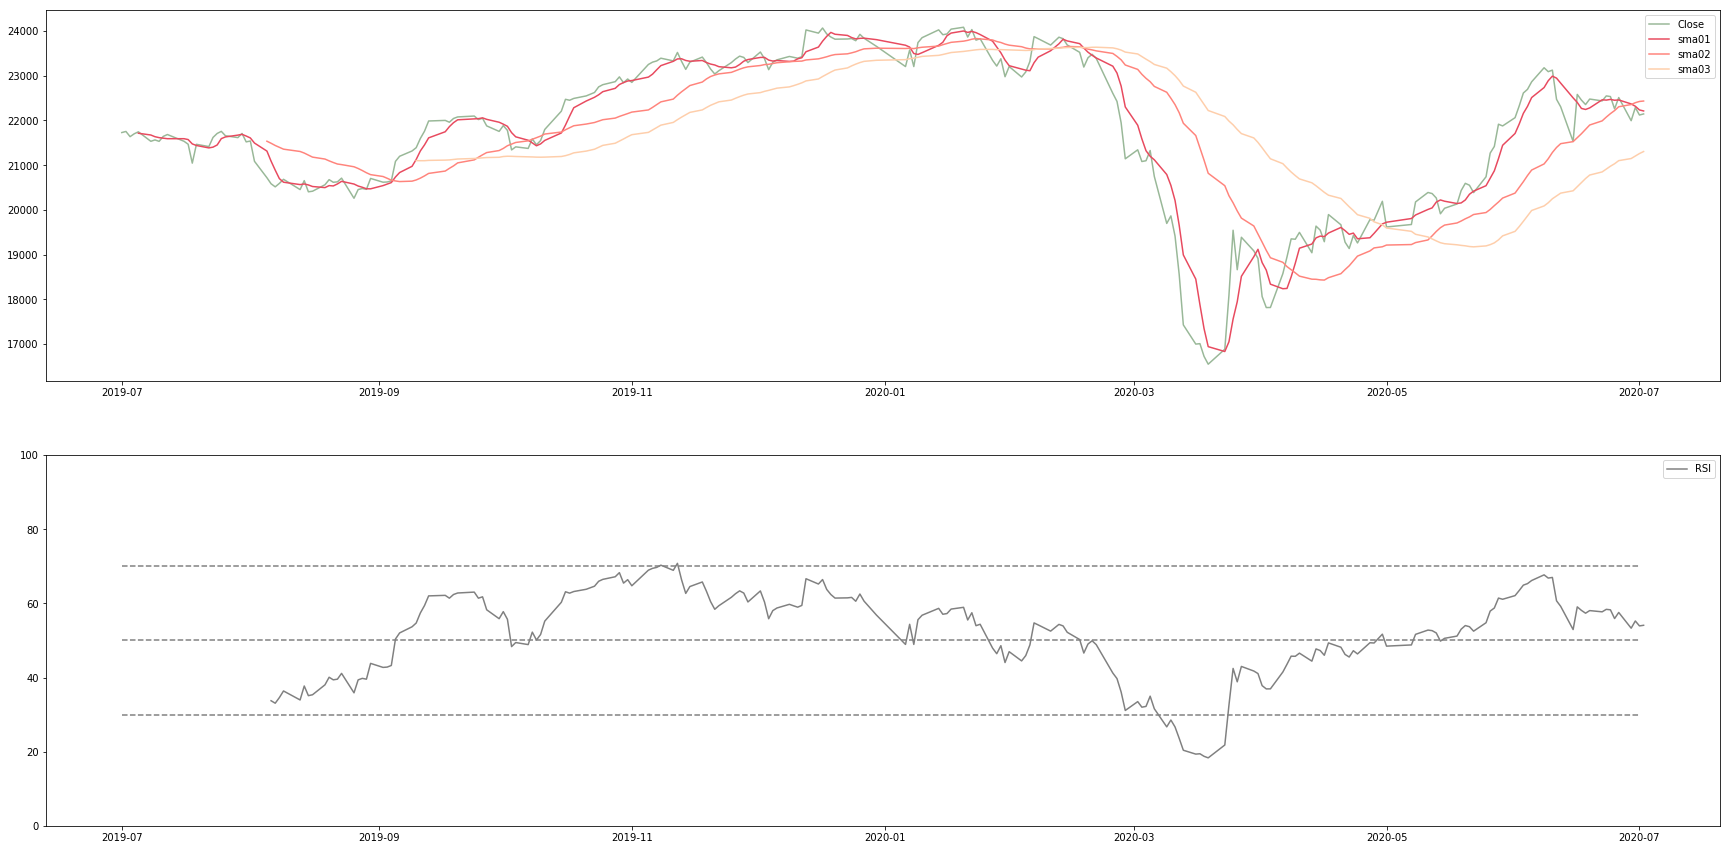

In [13]:
plt.figure(figsize=(30, 15))
plt.subplot(2,1,1)

plt.plot(date,close,label='Close',color='#99b898')
plt.plot(date,df['sma01'],label='sma01',color='#e84a5f')
plt.plot(date,df['sma02'],label='sma02',color='#ff847c')
plt.plot(date,df['sma03'],label='sma03',color='#feceab')
plt.legend()

plt.subplot(2,1,2)
plt.plot(date,df['RSI'],label='RSI',color="gray")
plt.ylim(0, 100)
plt.hlines([30,50,70],start,end,"gray",linestyles="dashed")
plt.legend()

### ▼ ボリンジャーバンド

In [14]:
df["upper"], df["middle"], df["lower"] = ta.BBANDS(close, timeperiod=span02, nbdevup=2, nbdevdn=2, matype=0)

In [15]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close,sma01,sma02,sma03,macd,macdsignal,macdhist,RSI,upper,middle,lower
Date,,,,,,,,,,,,,,,,
2020-06-26,22589.140625,22408.269531,22424.369141,22512.080078,66600000,22512.080078,22458.501953,22306.225234,21102.236562,357.802813,463.676153,-105.873340,57.560379,23454.238943,22306.225234,21158.211526
2020-06-29,22281.380859,21969.589844,22255.050781,21995.039062,73700000,21995.039062,22370.055859,22356.360781,21149.361133,298.284895,430.597901,-132.313007,53.315995,23321.613062,22356.360781,21391.108501
2020-06-30,22448.300781,22273.380859,22335.099609,22288.140625,74200000,22288.140625,22317.873828,22397.039609,21204.122148,271.636110,398.805543,-127.169433,55.263914,23255.768474,22397.039609,21538.310745
2020-07-01,22360.310547,22039.560547,22338.300781,22121.730469,67400000,22121.730469,22235.355859,22425.139609,21260.752773,234.386981,365.921831,-131.534850,53.933006,23195.468324,22425.139609,21654.810895
2020-07-02,22267.509766,22072.109375,22182.679688,22145.960938,73600000,22145.960938,22212.590234,22434.325625,21305.726797,204.465028,333.630470,-129.165442,54.100664,23185.400982,22434.325625,21683.250268


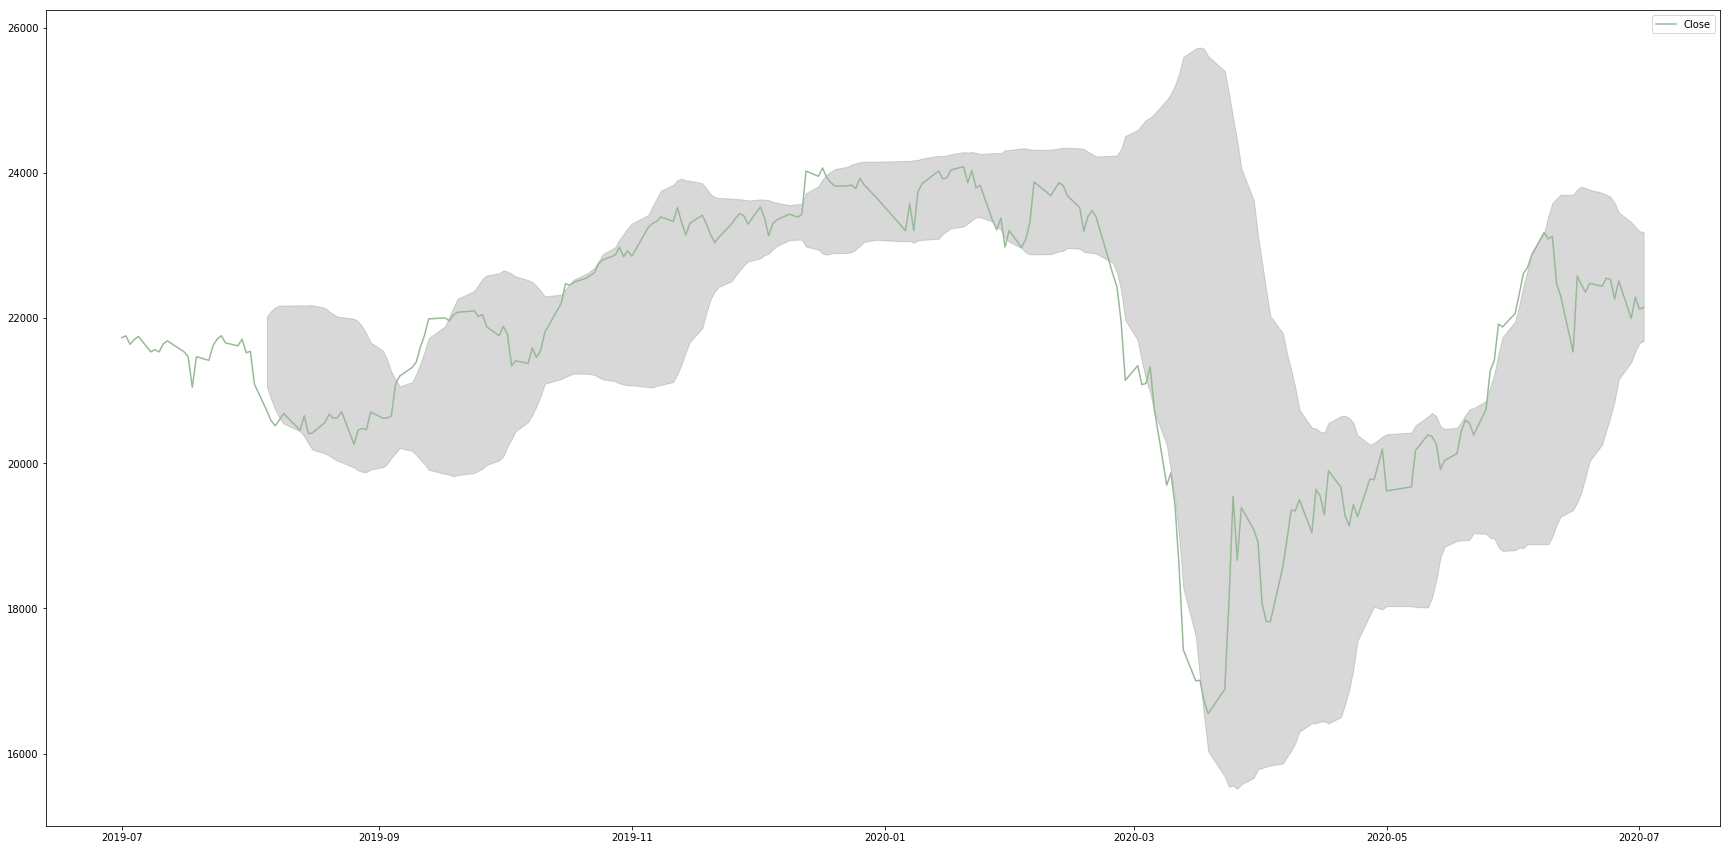

In [16]:
plt.figure(figsize=(30, 15))

plt.plot(date,close,label='Close',color='#99b898')
plt.fill_between(date, df["upper"], df["lower"], color="gray", alpha=0.3)
plt.legend()

### ▼ すべての指標を表示

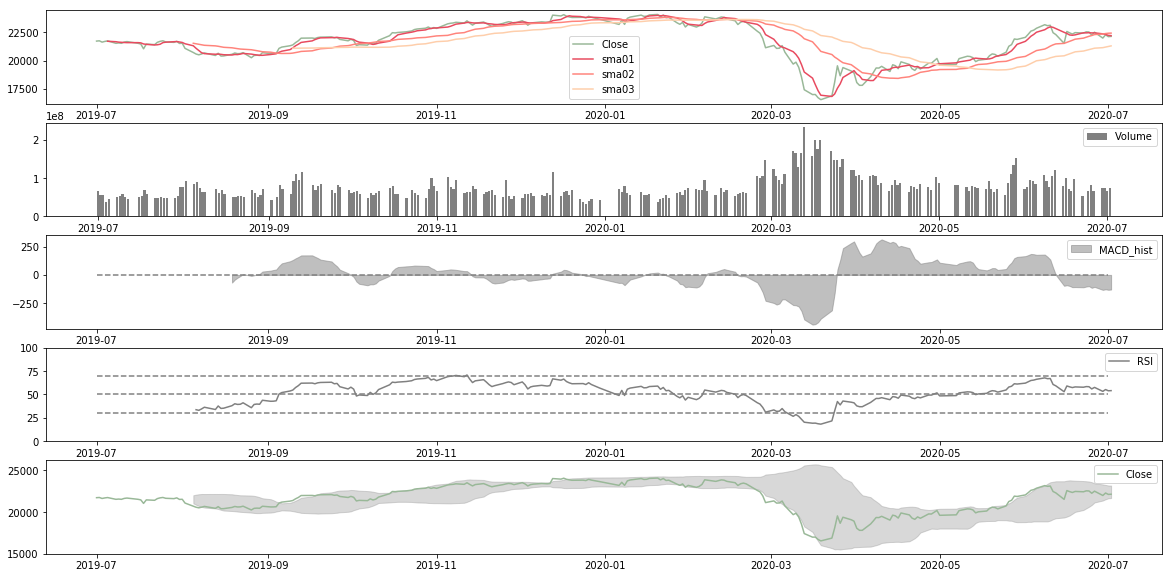

In [17]:
#すべての指標を表示
plt.figure(figsize=(20, 10))
plt.subplot(5,1,1)

plt.plot(date,close,label='Close',color='#99b898')
plt.plot(date,df['sma01'],label='sma01',color='#e84a5f')
plt.plot(date,df['sma02'],label='sma02',color='#ff847c')
plt.plot(date,df['sma03'],label='sma03',color='#feceab')
plt.legend()

plt.subplot(5,1,2)
plt.bar(date,df['Volume'],label='Volume',color='grey')
plt.legend()

plt.subplot(5,1,3)
plt.fill_between(date, df['macdhist'], color = 'grey', alpha=0.5, label='MACD_hist')
plt.hlines(0,start,end,"gray",linestyles="dashed")
plt.legend()

plt.subplot(5,1,4)
plt.plot(date,df['RSI'],label='RSI',color="gray")
plt.ylim(0, 100)
plt.hlines([30,50,70],start,end,"gray",linestyles="dashed")
plt.legend()

plt.subplot(5,1,5)
plt.plot(date,close,label='Close',color='#99b898')
plt.fill_between(date, df["upper"], df["lower"], color="gray", alpha=0.3)
plt.legend()

savename = 'bitcoin.png'
plt.savefig(savename,dpi=300)

### ▼ Bitcoin（日本円とビットコイン ）

In [18]:
start = '2017-07-01'
end = '2020-07-01'
 
df = data.DataReader('BTC-JPY','yahoo',start,end)

In [19]:
df.head(30)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-07-01,282590.593750,271800.500000,280043.625000,273521.687500,87623336102,273521.687500
2017-07-02,282328.500000,269060.281250,273729.531250,281301.125000,90204526708,281301.125000
2017-07-03,293702.093750,279127.281250,280413.406250,290687.500000,109301377440,290687.500000
2017-07-04,297343.375000,290076.750000,290340.562500,293881.250000,111323890975,293881.250000
2017-07-05,296674.156250,288176.187500,294020.218750,294519.250000,106575857351,294519.250000
2017-07-06,296055.687500,292557.093750,295210.843750,295158.562500,86215433645,295158.562500
2017-07-07,332119.187500,284571.343750,295161.968750,286825.000000,104474874916,286825.000000
2017-07-08,292824.218750,283824.281250,287008.343750,292824.218750,83511618578,292824.218750
2017-07-09,300129.593750,286929.750000,292968.843750,286976.218750,60149191200,286976.218750


In [20]:
#今までみてきたテクニカル指標をコピペ
date=df.index
close=df['Adj Close']

span01=5
span02=25
span03=50

df['sma01'] = close.rolling(window=span01).mean()
df['sma02'] = close.rolling(window=span02).mean()
df['sma03'] = close.rolling(window=span03).mean()
df['macd'], df['macdsignal'], df['macdhist'] = ta.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)
df['RSI'] = ta.RSI(close, timeperiod=span02)
df["upper"], df["middle"], df["lower"] = ta.BBANDS(close, timeperiod=span02, nbdevup=2, nbdevdn=2, matype=0)

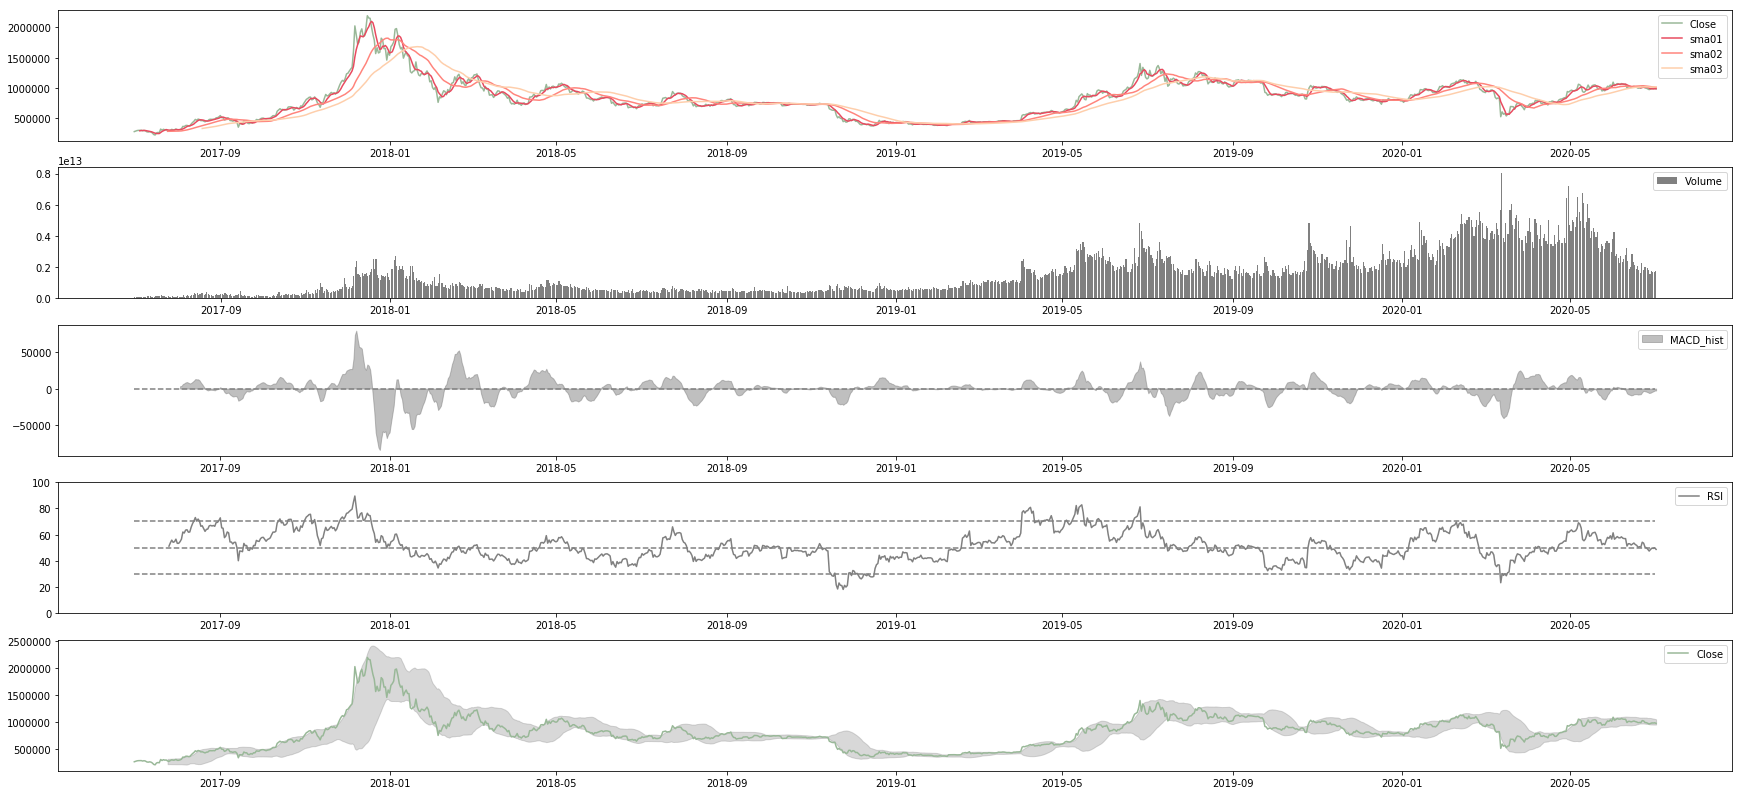

In [21]:
#すべての指標を表示
plt.figure(figsize=(30, 14))
plt.subplot(5,1,1)

plt.plot(date,close,label='Close',color='#99b898')
plt.plot(date,df['sma01'],label='sma01',color='#e84a5f')
plt.plot(date,df['sma02'],label='sma02',color='#ff847c')
plt.plot(date,df['sma03'],label='sma03',color='#feceab')
plt.legend()

plt.subplot(5,1,2)
plt.bar(date,df['Volume'],label='Volume',color='grey')
plt.legend()

plt.subplot(5,1,3)
plt.fill_between(date, df['macdhist'], color = 'grey', alpha=0.5, label='MACD_hist')
plt.hlines(0,start,end,"gray",linestyles="dashed")
plt.legend()

plt.subplot(5,1,4)
plt.plot(date,df['RSI'],label='RSI',color="gray")
plt.ylim(0, 100)
plt.hlines([30,50,70],start,end,"gray",linestyles="dashed")
plt.legend()

plt.subplot(5,1,5)
plt.plot(date,close,label='Close',color='#99b898')
plt.fill_between(date, df["upper"], df["lower"], color="gray", alpha=0.3)
plt.legend()

### ▼ 為替（日本円とUSドル）

In [22]:
start = '2020-01-01'
end = '2020-07-01'
 
df = data.DataReader('DEXJPUS', 'fred', start, end)

In [23]:
df.head(20)

,DEXJPUS
DATE,
2020-01-01,NaN
2020-01-02,108.43
2020-01-03,107.94
2020-01-06,108.36
2020-01-07,108.53
2020-01-08,109.03
2020-01-09,109.47
2020-01-10,109.50
2020-01-13,109.93


In [24]:
df=df.rename(columns={'DEXJPUS':'Adj Close'})

In [25]:
df = df.dropna()

In [26]:
df.head(20)

,Adj Close
DATE,
2020-01-02,108.43
2020-01-03,107.94
2020-01-06,108.36
2020-01-07,108.53
2020-01-08,109.03
2020-01-09,109.47
2020-01-10,109.50
2020-01-13,109.93
2020-01-14,110.05


In [27]:
#今までみてきたテクニカル指標をコピペ
date=df.index
close=df['Adj Close']

span01=5
span02=25
span03=50

df['sma01'] = close.rolling(window=span01).mean()
df['sma02'] = close.rolling(window=span02).mean()
df['sma03'] = close.rolling(window=span03).mean()
df['macd'], df['macdsignal'], df['macdhist'] = ta.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)
df['RSI'] = ta.RSI(close, timeperiod=span02)
df["upper"], df["middle"], df["lower"] = ta.BBANDS(close, timeperiod=span02, nbdevup=2, nbdevdn=2, matype=0)

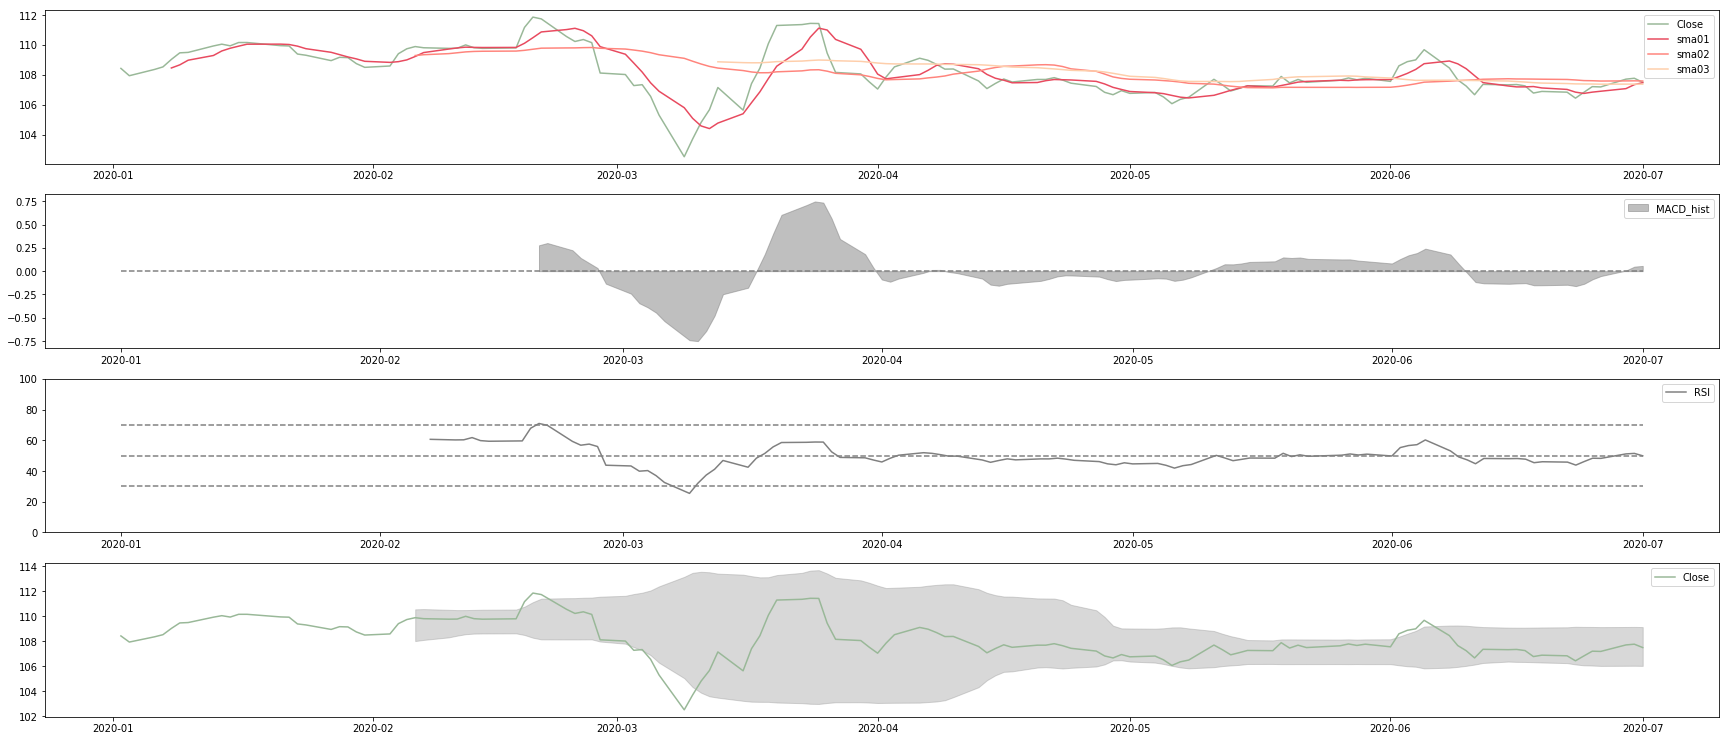

In [28]:
#すべての指標を表示
plt.figure(figsize=(30, 13))
plt.subplot(4,1,1)

plt.plot(date,close,label='Close',color='#99b898')
plt.plot(date,df['sma01'],label='sma01',color='#e84a5f')
plt.plot(date,df['sma02'],label='sma02',color='#ff847c')
plt.plot(date,df['sma03'],label='sma03',color='#feceab')
plt.legend()

plt.subplot(4,1,2)
plt.fill_between(date, df['macdhist'], color = 'grey', alpha=0.5, label='MACD_hist')
plt.hlines(0,start,end,"gray",linestyles="dashed")
plt.legend()

plt.subplot(4,1,3)
plt.plot(date,df['RSI'],label='RSI',color="gray")
plt.ylim(0, 100)
plt.hlines([30,50,70],start,end,"gray",linestyles="dashed")
plt.legend()

plt.subplot(4,1,4)
plt.plot(date,close,label='Close',color='#99b898')
plt.fill_between(date, df["upper"], df["lower"], color="gray", alpha=0.3)
plt.legend()

### ▼ ローソク足


In [29]:
import mplfinance as mpf

In [30]:
start = '2019-07-01'
end = '2020-07-01'
 
df = data.DataReader('^N225', 'yahoo', start, end)

In [31]:
date=df.index
close=df['Adj Close']

In [32]:
span01=5
span02=25
span03=50

df["upper"], df["middle"], df["lower"] = ta.BBANDS(close, timeperiod=span02, nbdevup=2, nbdevdn=2, matype=0)

In [33]:
df_candle = df[['High',"Low","Open","Close","Volume"]]

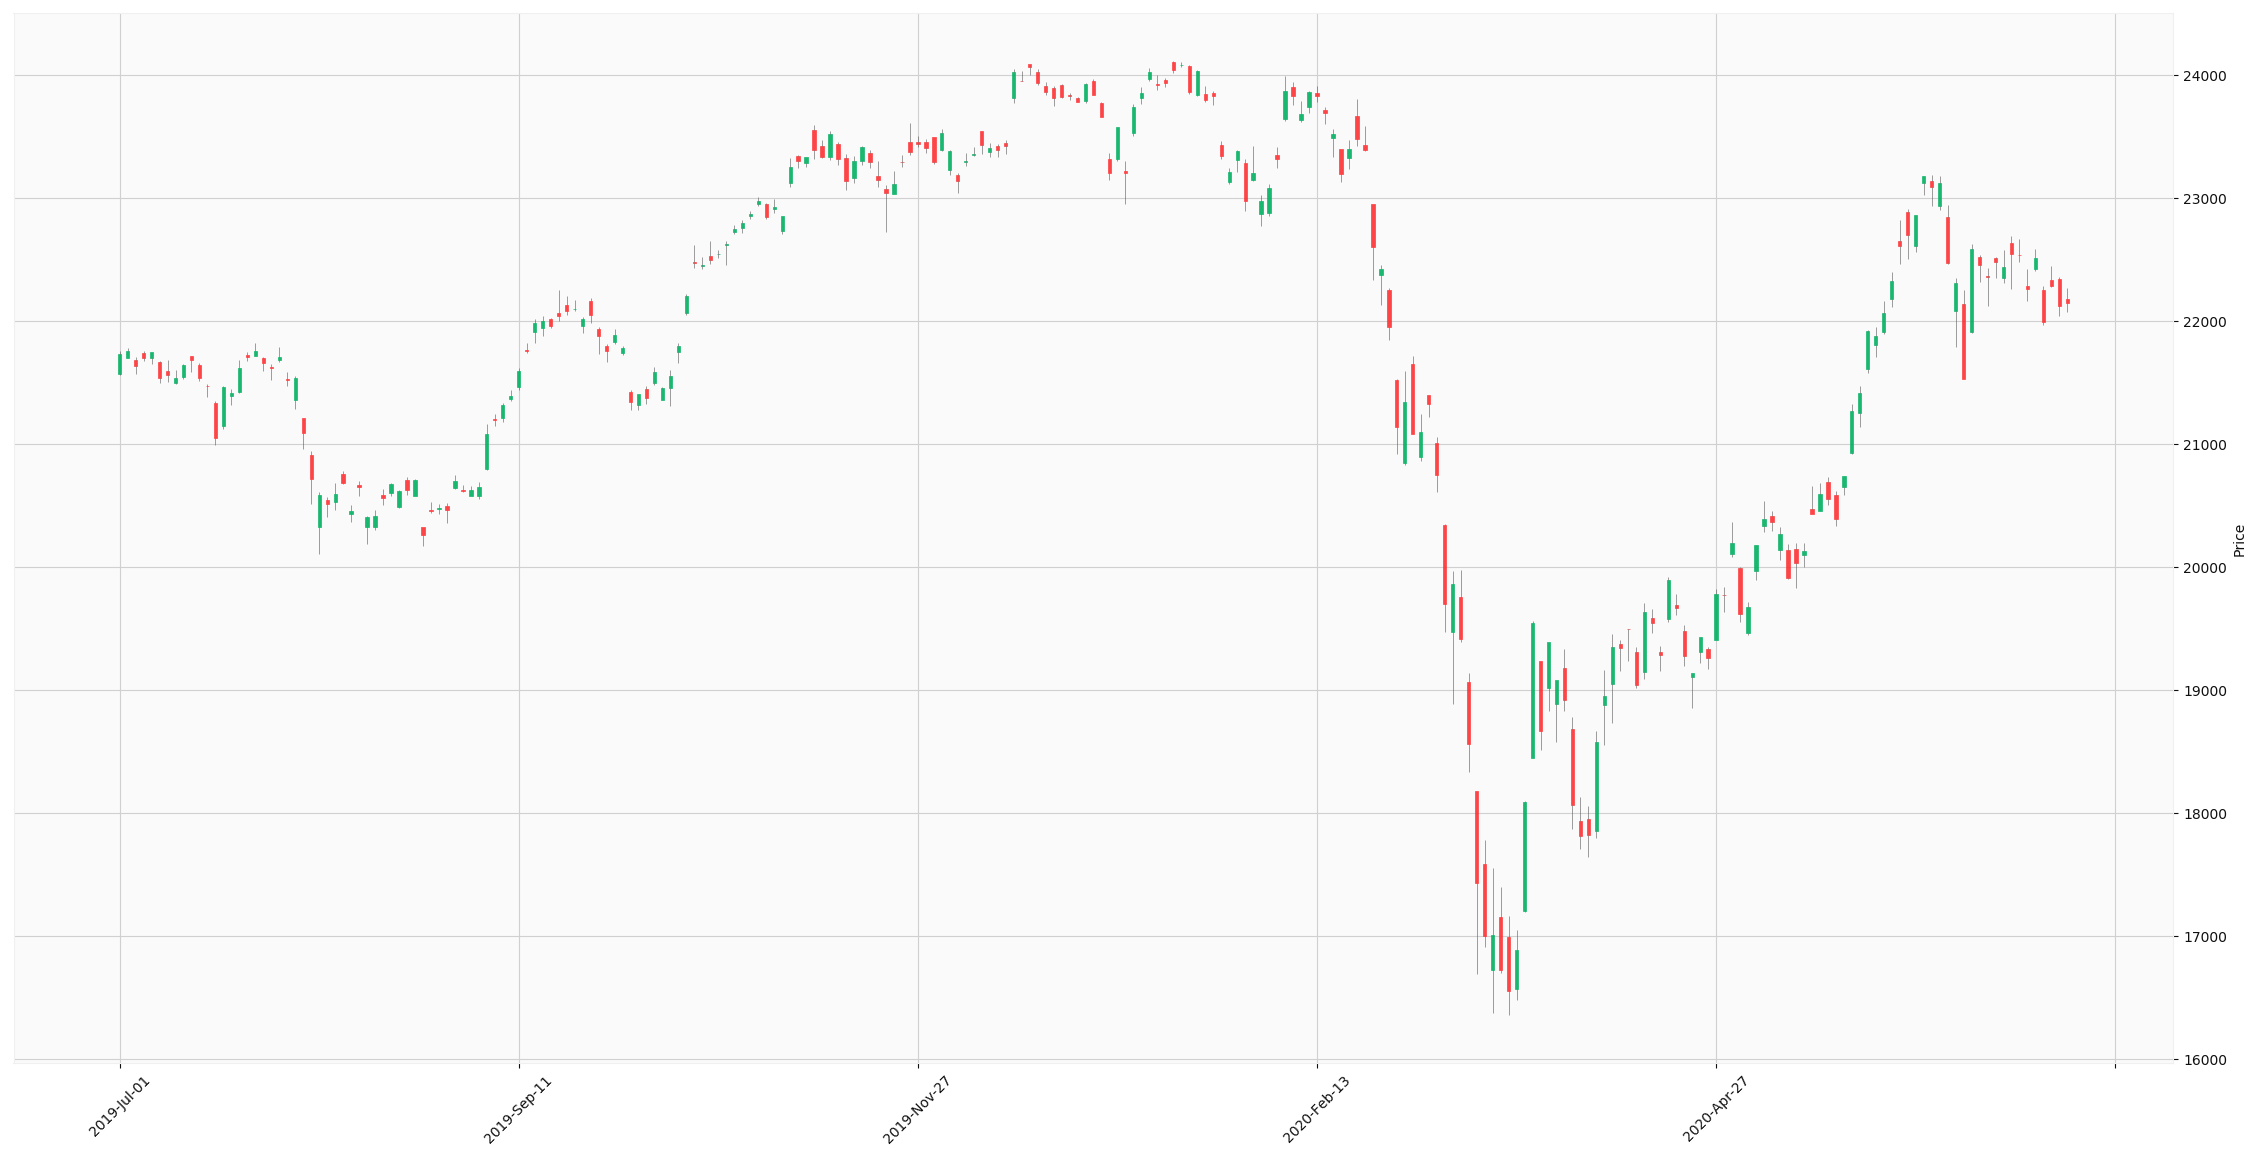

In [34]:
mpf.plot(df_candle,type='candle',style='yahoo',figsize=(30, 15))

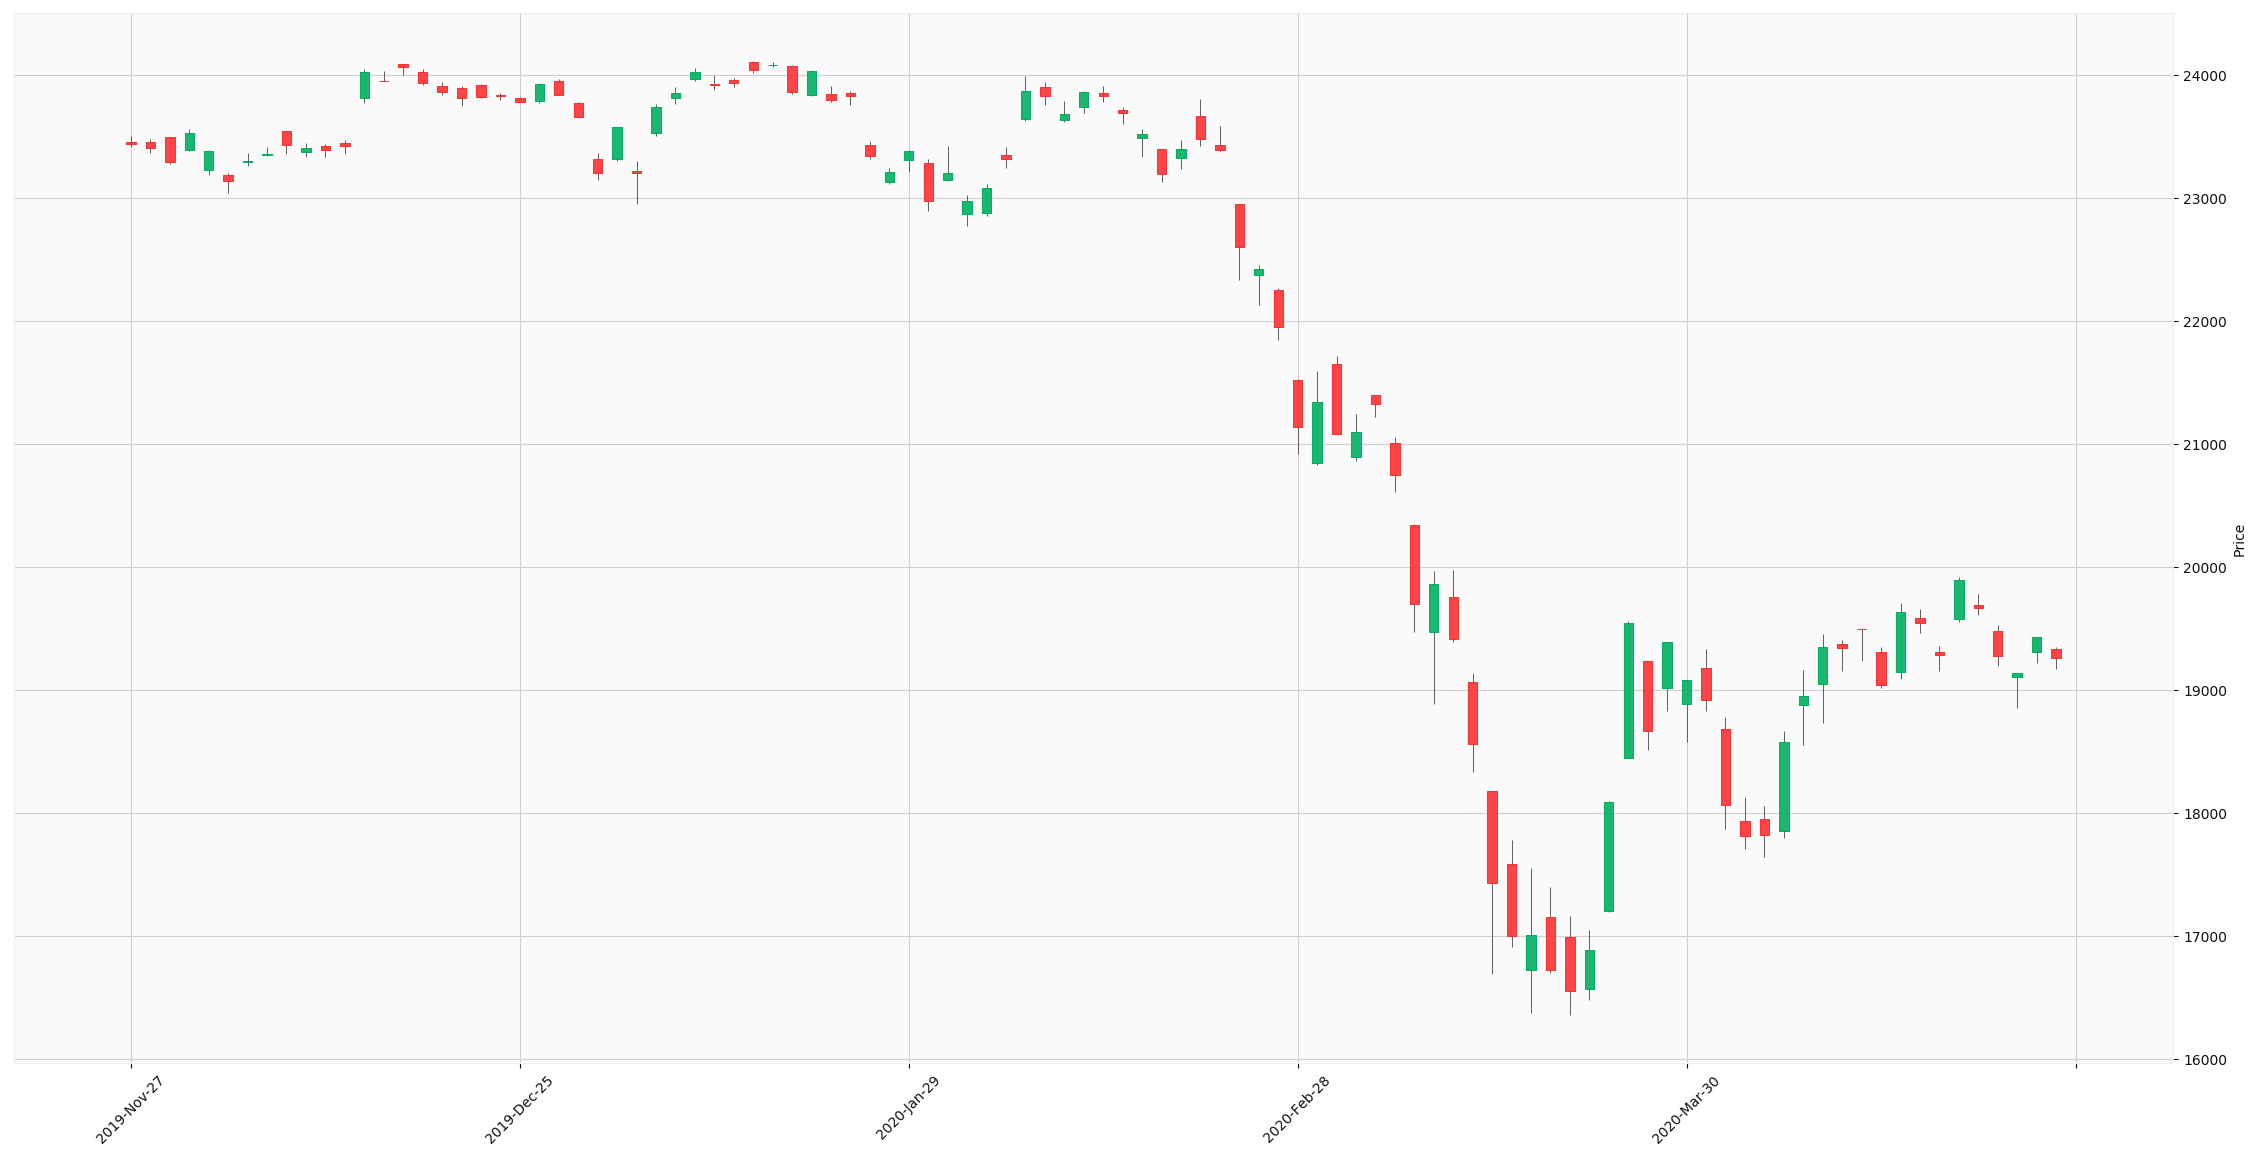

In [35]:
mpf.plot(df_candle[100:200],type='candle',style='yahoo',figsize=(30, 15))

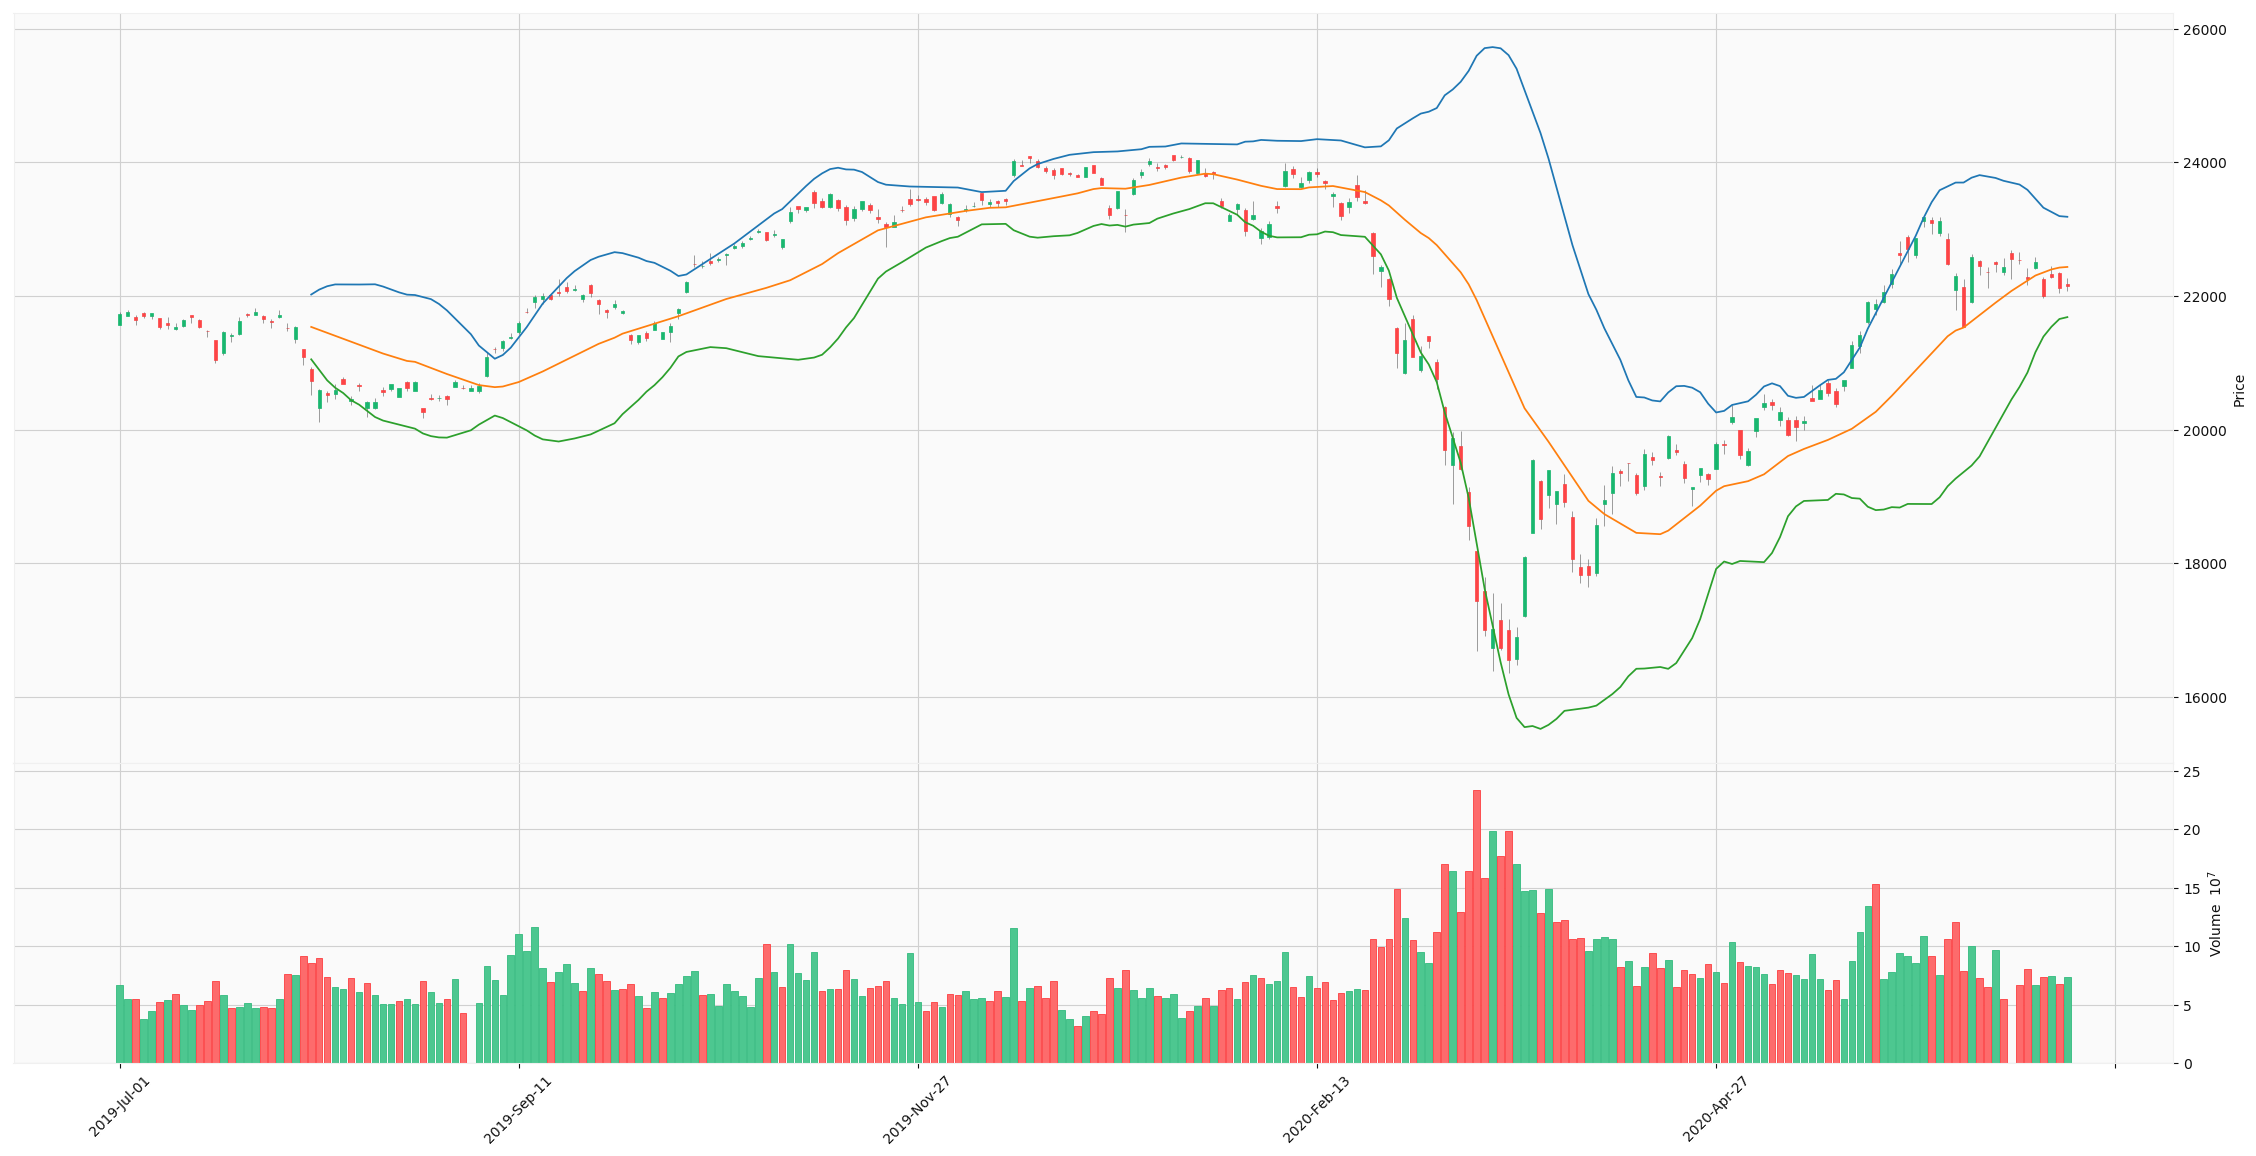

In [36]:
tcdf = df[['upper','middle','lower']]
apd  = mpf.make_addplot(tcdf)

mpf.plot(df_candle,addplot=apd,type='candle',volume=True,style='yahoo',figsize=(30, 15))